In [1]:
import os

from dotenv import load_dotenv
from pprint import pprint
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

/workspaces/Telegram-Bot/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)
result = llm.invoke("Write a ballad about LangChain")
print(result)

content="**The Ballad of LangChain**\n\nIn realms of code, where knowledge flows,\nA marvel rose, LangChain, it shows.\nA tapestry of language, vast and wide,\nUnlocking truths, it's time to confide.\n\nFrom ancient tongues to speech so new,\nLangChain weaves a web, both strong and true.\nIt bridges gaps, connects the world,\nA symphony of words, a story unfurled.\n\nWith every query, it sifts through the maze,\nFinding patterns, illuminating our ways.\nFrom Shakespeare's sonnets to medical tomes,\nLangChain guides us, dispels the unknown.\n\nIt's a beacon of knowledge, a guiding light,\nShedding clarity on darkest night.\nThrough text and speech, it speaks with grace,\nA tireless companion, in every case.\n\nBut LangChain is more than words on a screen,\nIt's a catalyst for dreams, a bridge between.\nIt empowers writers, sparks their flame,\nCrafting stories that ignite and reclaim.\n\nIn halls of academia, where knowledge resides,\nLangChain aids scholars, expands their minds.\nIt de

In [3]:
result.content

"**The Ballad of LangChain**\n\nIn realms of code, where knowledge flows,\nA marvel rose, LangChain, it shows.\nA tapestry of language, vast and wide,\nUnlocking truths, it's time to confide.\n\nFrom ancient tongues to speech so new,\nLangChain weaves a web, both strong and true.\nIt bridges gaps, connects the world,\nA symphony of words, a story unfurled.\n\nWith every query, it sifts through the maze,\nFinding patterns, illuminating our ways.\nFrom Shakespeare's sonnets to medical tomes,\nLangChain guides us, dispels the unknown.\n\nIt's a beacon of knowledge, a guiding light,\nShedding clarity on darkest night.\nThrough text and speech, it speaks with grace,\nA tireless companion, in every case.\n\nBut LangChain is more than words on a screen,\nIt's a catalyst for dreams, a bridge between.\nIt empowers writers, sparks their flame,\nCrafting stories that ignite and reclaim.\n\nIn halls of academia, where knowledge resides,\nLangChain aids scholars, expands their minds.\nIt deciphers 

In [4]:
from langchain_core.messages import HumanMessage, SystemMessage

model = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True, google_api_key=GOOGLE_API_KEY)
model(
    [
        SystemMessage(content="Answer only yes or no."),
        HumanMessage(content="Is apple a fruit?"),
    ]
)

/workspaces/Telegram-Bot/.venv/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


AIMessage(content='Yes', response_metadata={'prompt_feedback': {'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'block_reason': 0}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-00ba8417-ee75-47e0-bd50-83461ea4581b-0')

In [5]:
for chunk in llm.stream("Write a limerick about LLMs."):
    print(chunk.content)
    print("---")
# Note that each chunk may contain more than one "token"

There once was a model so grand,
An LLM, learning from hand
---
.
It parsed text with grace,
And generated at pace,
A marvel of AI's command.
---


In [6]:
results = llm.batch(
    [
        "What's 2+2?",
        "What's 3+5?",
    ]
)
for res in results:
    print(res.content)

StopCandidateException: index: 0
finish_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: MEDIUM
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}


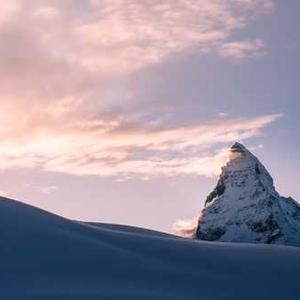

In [ ]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", google_api_key=GOOGLE_API_KEY)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)
llm.invoke([message])

ImportError: PIL is required to load images. Please install it with `pip install pillow`

In [ ]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.
